# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 

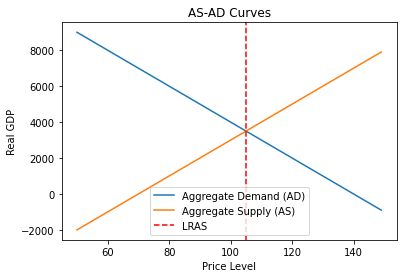

1.0666666666666667


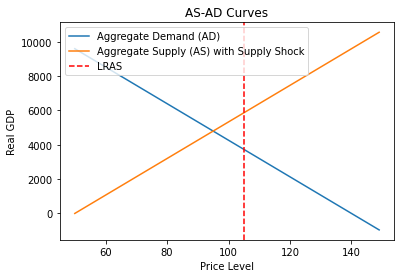

1.0666666666666667


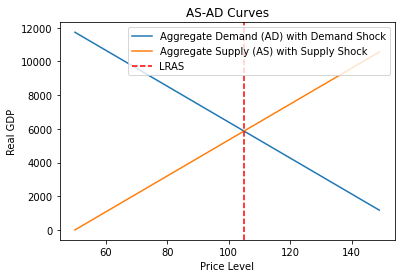

Adjusted Exchange Rate: 0.9833333333333334


In [2]:
"""import matplotlib.pyplot as plt

initial_price_level = 100
initial_real_gdp = 5000
initial_aggregate_demand = 4000
initial_aggregate_supply = 3000
exchange_rate = 0.4

def aggregate_demand(price_level, supply_shock=0,exchange_rate=0):
    return exchange_rate*(initial_aggregate_demand - 100 * (price_level - initial_price_level) + supply_shock)

def aggregate_supply(price_level, supply_shock=0,exchange_rate=0):
    return exchange_rate*(initial_aggregate_supply + 100 * (price_level - initial_price_level) + supply_shock)

price_levels = range(50, 150)

def calculate_ad_values(price_levels, supply_shock=0):
    return [aggregate_demand(price_level, supply_shock,exchange_rate) for price_level in price_levels]

def calculate_as_values(price_levels, supply_shock=0):
    return [aggregate_supply(price_level, supply_shock,exchange_rate) for price_level in price_levels]

def find_intersection_point(ad_values, as_values, price_levels):

    intersection_index = next(i for i, (ad, as_) in enumerate(zip(ad_values, as_values)) if ad <= as_)
    intersection_price_level = price_levels[intersection_index]
    return intersection_price_level

def plot_ad_as_lines(price_levels, ad_values, as_values, intersection=None,supply_shock=0,demand_shock=0):
    labelAD = 'Aggregate Demand (AD)'
    labelAS = 'Aggregate Supply (AS)'
    if supply_shock != 0:
        
        labelAS = 'Aggregate Supply (AS) with Supply Shock'
    if demand_shock != 0:
        labelAD = 'Aggregate Demand (AD) with Demand Shock'
        
    plt.plot(price_levels, ad_values, label=labelAD)
    plt.plot(price_levels, as_values, label=labelAS)
    
    if intersection is not None:
        plt.axvline(x=intersection, color='red', linestyle='--', label='LRAS')

    plt.xlabel('Price Level')
    plt.ylabel('Real GDP')
    plt.legend()

    plt.show()

ad_values = calculate_ad_values(price_levels)
as_values = calculate_as_values(price_levels)
intersection_point = find_intersection_point(ad_values, as_values, price_levels)

plot_ad_as_lines(price_levels, ad_values, as_values,intersection_point)


ad_values = calculate_ad_values(price_levels)
as_new_values = calculate_as_values(price_levels,2000)
plot_ad_as_lines(price_levels, ad_values, as_new_values,intersection_point,supply_shock=1)

ad_new_values = calculate_ad_values(price_levels,2000)
as_new_values = calculate_as_values(price_levels,2000)
plot_ad_as_lines(price_levels, ad_new_values, as_new_values,intersection_point,supply_shock=1,demand_shock=1)

"""

import matplotlib.pyplot as plt

initial_price_level = 100
initial_real_gdp = 5000
initial_aggregate_demand = 4000
initial_aggregate_supply = 3000
initial_exchange_rate = 1

def adjust_exchange_rate(supply_shock, demand_shock, exchange_rate):
    # Adjust exchange rate based on shocks
    supply_adjustment = (supply_shock/10) / initial_aggregate_supply
    demand_adjustment = (demand_shock/10) / initial_aggregate_demand

    # Update exchange rate
    new_exchange_rate = exchange_rate * (1 + supply_adjustment - demand_adjustment)
    return new_exchange_rate

def aggregate_demand(price_level, supply_shock=0, exchange_rate=initial_exchange_rate):
    return exchange_rate * (initial_aggregate_demand - 100 * (price_level - initial_price_level) + supply_shock)

def aggregate_supply(price_level, supply_shock=0, exchange_rate=initial_exchange_rate):
    return exchange_rate * (initial_aggregate_supply + 100 * (price_level - initial_price_level) + supply_shock)

price_levels = range(50, 150)

def calculate_ad_values(price_levels, supply_shock=0, exchange_rate=initial_exchange_rate):
    return [aggregate_demand(price_level, supply_shock, exchange_rate) for price_level in price_levels]

def calculate_as_values(price_levels, supply_shock=0, exchange_rate=initial_exchange_rate):
    return [aggregate_supply(price_level, supply_shock, exchange_rate) for price_level in price_levels]

def find_intersection_point(ad_values, as_values, price_levels):
    intersection_index = next(i for i, (ad, as_) in enumerate(zip(ad_values, as_values)) if ad <= as_)
    intersection_price_level = price_levels[intersection_index]
    return intersection_price_level

def plot_ad_as_lines(price_levels, ad_values, as_values, intersection=None, supply_shock=0, demand_shock=0):
    label_AD = 'Aggregate Demand (AD)'
    label_AS = 'Aggregate Supply (AS)'
    if supply_shock != 0:
        label_AS = 'Aggregate Supply (AS) with Supply Shock'
    if demand_shock != 0:
        label_AD = 'Aggregate Demand (AD) with Demand Shock'
    plt.plot(price_levels, ad_values, label=label_AD)
    plt.plot(price_levels, as_values, label=label_AS)
    if intersection is not None:
        plt.axvline(x=intersection, color='red', linestyle='--', label='LRAS')
    plt.xlabel('Price Level')
    plt.ylabel('Real GDP')
    plt.legend()
    plt.title('AS-AD Curves')
    plt.show()

# Original AS-AD Curves
ad_values = calculate_ad_values(price_levels)
as_values = calculate_as_values(price_levels)
intersection_point = find_intersection_point(ad_values, as_values, price_levels)
plot_ad_as_lines(price_levels, ad_values, as_values, intersection_point)

new_exchange_rate = adjust_exchange_rate(supply_shock=2000, demand_shock=0, exchange_rate=initial_exchange_rate)
print(new_exchange_rate)
ad_values = calculate_ad_values(price_levels,exchange_rate=new_exchange_rate)
as_new_values = calculate_as_values(price_levels, supply_shock= 2000,exchange_rate=new_exchange_rate)

plot_ad_as_lines(price_levels, ad_values, as_new_values, intersection_point, supply_shock=1)



new_exchange_rate = adjust_exchange_rate(supply_shock=2000, demand_shock=0, exchange_rate=initial_exchange_rate)
print(new_exchange_rate)
ad_new_values = calculate_ad_values(price_levels, supply_shock=2000,exchange_rate=new_exchange_rate)
as_new_values = calculate_as_values(price_levels, supply_shock=2000,exchange_rate=new_exchange_rate)
plot_ad_as_lines(price_levels, ad_new_values, as_new_values, intersection_point, supply_shock=1, demand_shock=1)


new_exchange_rate = adjust_exchange_rate(supply_shock=-2000, demand_shock=-2000, exchange_rate=initial_exchange_rate)
print("Adjusted Exchange Rate:", new_exchange_rate)
